The E Coli Imbalanced Dataset

The dataset describes the problem of classifying E.coli proteins using their amino acid sequences in their cell localization sites. That is, predicting how a protein will bind to a cell based on the chemical composition of the protein before it is folded.

The dataset is credited to Kenta Nakai and was developed into its current form by Paul Horton and Kenta Nakai in their 1996 paper titled “A Probabilistic Classification System For Predicting The Cellular Localization Sites Of Proteins.” In it, they achieved a classification accuracy of 81%.

The dataset is comprised of 336 examples of E.coli proteins and each example is described using seven input variables calculated from the proteins amino acid sequence.

Ignoring the sequence name, the input features are described as follows:

mcg: McGeoch’s method for signal sequence recognition.

gvh: von Heijne’s method for signal sequence recognition.

lip: von Heijne’s Signal Peptidase II consensus sequence score.

chg: Presence of charge on N-terminus of predicted lipoproteins.

aac: score of discriminant analysis of the amino acid content of outer membrane and periplasmic proteins.

alm1: score of the ALOM membrane-spanning region prediction program.

alm2: score of ALOM program after excluding putative cleavable signal regions from the sequence.

There are eight classes described as follows:

cp: cytoplasm

im: inner membrane without signal sequence

pp: periplasm

imU: inner membrane, non cleavable signal sequence

om: outer membrane

omL: outer membrane lipoprotein

imL: inner membrane lipoprotein

imS: inner membrane, cleavable signal sequence



Load libraries

In [542]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Load datasets

In [543]:
#Load datasets
train=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/ecoli.csv")
train.columns = ['mcg','gvh', 'lip','chg','aac','alm1','alm2', 'result']

In [544]:
train

,mcg,gvh,lip,chg,aac,alm1,alm2,result
0,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
1,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
2,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
3,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
4,0.67,0.39,0.48,0.5,0.36,0.38,0.46,cp
...,...,...,...,...,...,...,...,...
330,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
331,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
332,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
333,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


Check for null values

In [545]:
train.isnull().sum()

mcg       0
gvh       0
lip       0
chg       0
aac       0
alm1      0
alm2      0
result    0
dtype: int64

Compare result with independant variables

In [546]:
result = train.groupby(by=("result")).sum().reset_index()
result

,result,mcg,gvh,lip,chg,aac,alm1,alm2
0,cp,51.50,58.30,68.16,71.0,64.43,44.47,56.17
1,im,36.84,38.24,37.48,38.5,41.28,58.33,56.24
2,imL,1.45,0.94,2.00,1.5,0.91,1.29,1.14
3,imS,1.48,1.02,0.96,1.0,1.07,1.28,1.14
4,imU,25.41,16.06,17.32,17.5,19.56,26.04,26.18
5,om,13.45,14.20,10.12,10.0,14.78,9.25,6.11
6,omL,3.49,2.56,5.00,2.5,2.71,2.82,1.11
7,pp,33.91,36.39,24.96,26.0,22.71,24.34,19.47


Label Encode result

In [547]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     335 non-null    float64
 1   gvh     335 non-null    float64
 2   lip     335 non-null    float64
 3   chg     335 non-null    float64
 4   aac     335 non-null    float64
 5   alm1    335 non-null    float64
 6   alm2    335 non-null    float64
 7   result  335 non-null    object 
dtypes: float64(7), object(1)
memory usage: 21.1+ KB


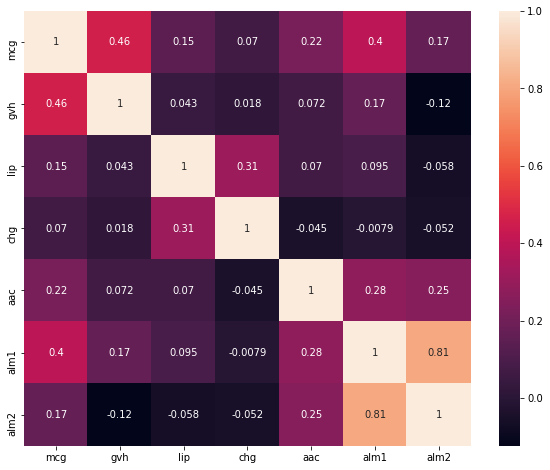

In [548]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), annot=True)

Count each class

In [549]:
import collections
from collections import Counter

counter = Counter(train.result)
for k,v in counter.items():
	per = v / len(train.result) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=cp, Count=142, Percentage=42.388%
Class=im, Count=77, Percentage=22.985%
Class=imS, Count=2, Percentage=0.597%
Class=imL, Count=2, Percentage=0.597%
Class=imU, Count=35, Percentage=10.448%
Class=om, Count=20, Percentage=5.970%
Class=omL, Count=5, Percentage=1.493%
Class=pp, Count=52, Percentage=15.522%


In [550]:
result = train.groupby('result')['result'].count()
result/len(train)*100

result
cp     42.388060
im     22.985075
imL     0.597015
imS     0.597015
imU    10.447761
om      5.970149
omL     1.492537
pp     15.522388
Name: result, dtype: float64

In [551]:
result1=train.groupby("result").count().reset_index()
result1

,result,mcg,gvh,lip,chg,aac,alm1,alm2
0,cp,142,142,142,142,142,142,142
1,im,77,77,77,77,77,77,77
2,imL,2,2,2,2,2,2,2
3,imS,2,2,2,2,2,2,2
4,imU,35,35,35,35,35,35,35
5,om,20,20,20,20,20,20,20
6,omL,5,5,5,5,5,5,5
7,pp,52,52,52,52,52,52,52


Percentage of result

In [552]:
result2=train.groupby("result").count()/len(train)*100
result2

,mcg,gvh,lip,chg,aac,alm1,alm2
result,,,,,,,
cp,42.388060,42.388060,42.388060,42.388060,42.388060,42.388060,42.388060
im,22.985075,22.985075,22.985075,22.985075,22.985075,22.985075,22.985075
imL,0.597015,0.597015,0.597015,0.597015,0.597015,0.597015,0.597015
imS,0.597015,0.597015,0.597015,0.597015,0.597015,0.597015,0.597015
imU,10.447761,10.447761,10.447761,10.447761,10.447761,10.447761,10.447761
om,5.970149,5.970149,5.970149,5.970149,5.970149,5.970149,5.970149
omL,1.492537,1.492537,1.492537,1.492537,1.492537,1.492537,1.492537
pp,15.522388,15.522388,15.522388,15.522388,15.522388,15.522388,15.522388


Graphical representation of result

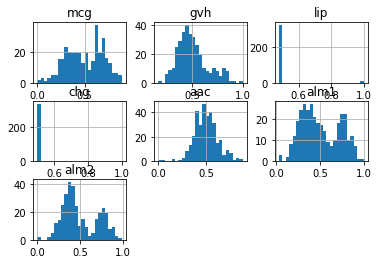

In [553]:
#create histograms of classes
# create histograms of all variables
from pandas import read_csv
from matplotlib import pyplot

# create a histogram plot of each variable
train.hist(bins=25)
# show the plot
pyplot.show()

Assign X and y variables

In [554]:
y = train.result
X = train.drop(['result'], axis = 1)

X.shape, y.shape

((335, 7), (335,))

Split training set up for training and validation

In [555]:
#split training set for training and testing
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.50, stratify=y, shuffle=True)
#check shapes of testing data
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((167, 7), (168, 7), (167,), (168,))

Scaler

In [556]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train = scaler.transform(X_train)
# Scale the test set
X_val = scaler.transform(X_val)

Apply PCA

In [557]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)

X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)

In [558]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.32019653, 0.22424219, 0.17311048, 0.1131709 , 0.08809501,
       0.06275314, 0.01843176])

Count values in validation set

In [559]:
from collections import Counter

print(Counter(y_val))

Counter({'cp': 71, 'im': 39, 'pp': 26, 'imU': 18, 'om': 10, 'omL': 2, 'imS': 1, 'imL': 1})


Class weights

In [560]:
from sklearn.utils import class_weight

class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced',np.unique(y_train), y_train))) 

Define model

CatBoost

In [561]:
!pip install catboost

In [562]:
from catboost import CatBoostClassifier

ct_model = CatBoostClassifier(loss_function='MultiClass', class_weights= [.58, .77, .9, .99, .90, .94, .99, .84], iterations=300, depth=5, random_state=1).fit(X_train, y_train)
print(ct_model.score(X_train, y_train))

Learning rate set to 0.199763
0:	learn: 1.7117921	total: 5.75ms	remaining: 1.72s
1:	learn: 1.5230632	total: 10.1ms	remaining: 1.51s
2:	learn: 1.3754949	total: 14.8ms	remaining: 1.47s
3:	learn: 1.2293165	total: 19ms	remaining: 1.41s
4:	learn: 1.1263759	total: 23.2ms	remaining: 1.37s
5:	learn: 1.0264761	total: 27.5ms	remaining: 1.34s
6:	learn: 0.9664764	total: 31.7ms	remaining: 1.33s
7:	learn: 0.9119221	total: 35.9ms	remaining: 1.31s
8:	learn: 0.8660882	total: 40.1ms	remaining: 1.29s
9:	learn: 0.8149693	total: 44.2ms	remaining: 1.28s
10:	learn: 0.7740270	total: 48.5ms	remaining: 1.27s
11:	learn: 0.7366528	total: 52.7ms	remaining: 1.26s
12:	learn: 0.7015292	total: 56.8ms	remaining: 1.25s
13:	learn: 0.6732461	total: 61.2ms	remaining: 1.25s
14:	learn: 0.6471852	total: 65.4ms	remaining: 1.24s
15:	learn: 0.6180455	total: 69.6ms	remaining: 1.23s
16:	learn: 0.5969999	total: 73.9ms	remaining: 1.23s
17:	learn: 0.5698686	total: 78.1ms	remaining: 1.22s
18:	learn: 0.5513397	total: 82.3ms	remaining: 

In [563]:
ct_pred = ct_model.predict(X_val)
print(ct_model.score(X_val, y_val))

0.8809523809523809


In [564]:
print(Counter(ct_pred[:,0]))

Counter({'cp': 75, 'im': 42, 'pp': 26, 'imU': 14, 'om': 9, 'omL': 2})


In [565]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

#y_test as first argument and the preds as second argument 
confusion_matrix(y_val, ct_pred)

array([[71,  0,  0,  0,  0,  0,  0,  0],
       [ 2, 32,  0,  0,  4,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  7,  0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  9,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  2,  0],
       [ 1,  1,  0,  0,  0,  0,  0, 24]])

In [567]:
import collections
from collections import Counter

counter = Counter(ct_pred[:,0])
for k,v in counter.items():
	per = v / len(ct_pred) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=pp, Count=26, Percentage=15.476%
Class=cp, Count=75, Percentage=44.643%
Class=im, Count=42, Percentage=25.000%
Class=omL, Count=2, Percentage=1.190%
Class=imU, Count=14, Percentage=8.333%
Class=om, Count=9, Percentage=5.357%


Random Forest

In [568]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=500, max_depth=10, random_state=1).fit(X_train, y_train)
print(rf_model.score(X_train, y_train))

1.0


In [569]:
rf_pred = rf_model.predict(X_val)
print(rf_model.score(X_val, y_val))

0.8869047619047619


In [570]:
print(Counter(rf_pred))

Counter({'cp': 74, 'im': 42, 'pp': 29, 'imU': 14, 'om': 7, 'omL': 2})


In [571]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

#y_test as first argument and the preds as second argument 
confusion_matrix(y_val, rf_pred)

array([[71,  0,  0,  0,  0,  0,  0,  0],
       [ 2, 33,  0,  0,  3,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  6,  0,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  7,  0,  3],
       [ 0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 25]])

In [572]:
#sns.distplot(rf_pred)

In [573]:
import collections
from collections import Counter

counter = Counter(rf_pred)
for k,v in counter.items():
	per = v / len(rf_pred) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=pp, Count=29, Percentage=17.262%
Class=cp, Count=74, Percentage=44.048%
Class=im, Count=42, Percentage=25.000%
Class=omL, Count=2, Percentage=1.190%
Class=imU, Count=14, Percentage=8.333%
Class=om, Count=7, Percentage=4.167%
